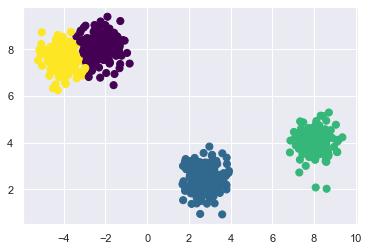

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

#产生实验数据
from sklearn.datasets._samples_generator import make_blobs
X, y_true = make_blobs(n_samples=700, centers=4,
                       cluster_std=0.5, random_state=2019)
X = X[:, ::-1] #方便画图

from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4).fit(X) #指定聚类中心个数为4
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

In [35]:
probs = gmm.predict_proba(X)
print(probs[:10].round(2))

[[0.   0.   1.   0.  ]
 [0.96 0.   0.   0.04]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]]


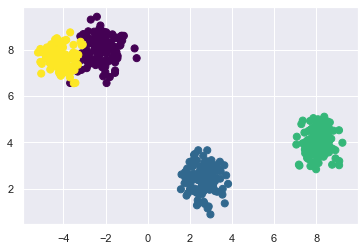

In [36]:
T,yt= gmm.sample(500)
labels = gmm.predict(T)
plt.scatter(T[:, 0], T[:, 1], c=yt, s=50, cmap='viridis')

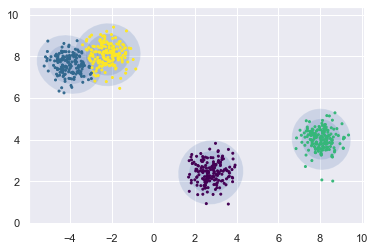

In [40]:
plot_gmm(gmm, X)

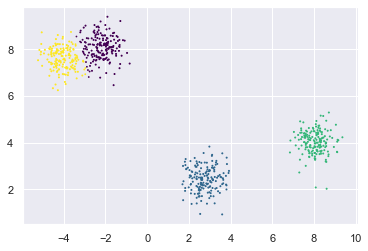

In [6]:
size = probs.max(1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)

In [13]:
from matplotlib.patches import Ellipse

#给定的位置和协方差画一个椭圆
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    #将协方差转换为主轴
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    #画出椭圆
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
#画图
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=4, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=4, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_  , gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

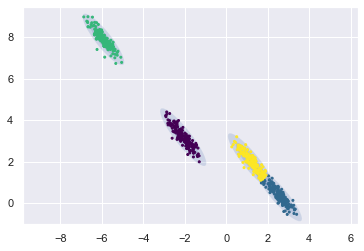

In [37]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
gmm = GMM(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

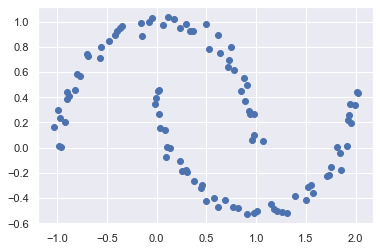

In [38]:
from sklearn.datasets import make_moons
Xmoon,ymoon = make_moons(100, noise=.04, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

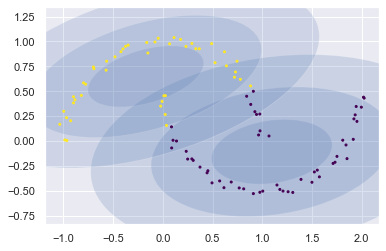

In [39]:
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

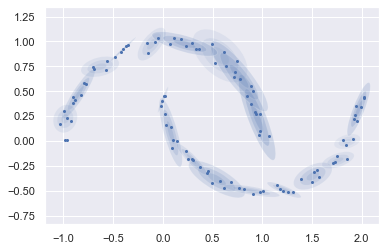

In [44]:
gmm10 = GMM(n_components=20, covariance_type='full', random_state=0)
plot_gmm(gmm10, Xmoon, label=False)

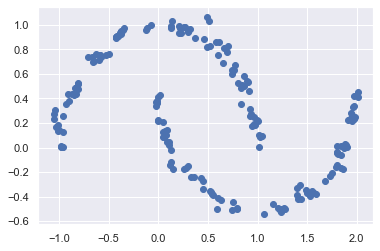

In [45]:
Xnew = gmm10.sample(200)[0]
plt.scatter(Xnew[:, 0], Xnew[:, 1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 0, 'n_components')

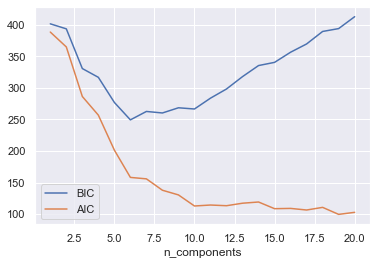

In [46]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

小结：GMM模型因其优秀的聚类表现，以及可以生产样本的强大功能，在风控领域的应用非常广泛。如对反欺诈中的欺诈样本抓取与生成、模型迭代中的幸存者偏差等问题都有一定的作用。

比如说在反欺诈检测模型中，可以先通过GMM模型对欺诈样本进行聚类，后将聚类后得到的簇作为同一类欺诈手段，后续只针对不同的簇进行建模，在实践中对欺诈客户的召回有很好的效果。

GMM可以用sample方法生成伪数据，用来扩充样本